# Breast Cancer Classification


## Importing the libraries


In [33]:
import numpy as np
import pandas as pd
import pathlib
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


DATA_DIR = pathlib.Path('./data/')


## Importing the dataset


In [34]:
data = pd.read_csv(os.path.join(DATA_DIR, 'BreastCancer.csv'))
labels = data['Class']
data.drop('Class', axis=1, inplace=True)
print('data:')
print(data)
print('labels:')
print(labels)


data:
     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1  

## Preprocessing the dataset


In [35]:
data = data.drop('Sample code number', axis='columns')


In [36]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data,
    labels,
    test_size=0.2,
    stratify=labels,
    random_state=42)


## Fitting the Categorical Naive Bayes Algorithm


In [37]:
nb_model = CategoricalNB()
scores = cross_val_score(nb_model, train_data, train_labels, cv=5)
scores


array([0.97272727, 0.97247706, 1.        , 0.96330275, 0.96330275])

In [38]:
nb_model.fit(train_data, train_labels)


CategoricalNB()

## Evaluating the model


In [39]:
nb_model.score(test_data, test_labels)


0.9708029197080292

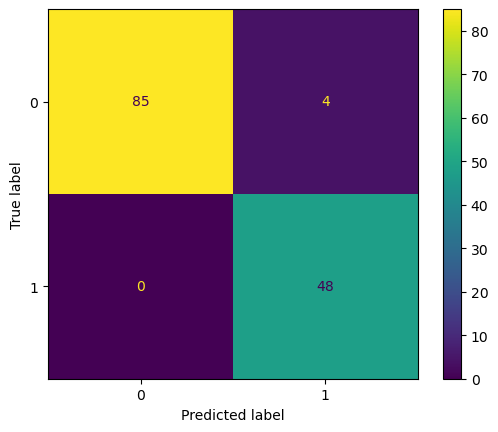

In [40]:
test_labels_pred = nb_model.predict(test_data)

cm_test = confusion_matrix(test_labels, test_labels_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                 display_labels=nb_model.classes_)
cm_disp.plot()
plt.show()